## Tymoteusz Stefański 240804 Analiza Danych 16.02.2024

# 1. Opis problemu

Dane dotyczą bezpośrednich kampanii marketingowych portugalskiej instytucji bankowej. Kampanie opierały się na rozmowach telefonicznych. Często konieczne było kilkukrotne skontaktowanie się z tym samym klientem, aby sprawdzić, czy produkt (lokata terminowa) zostanie zasubskrybowany.
Źródło: https://archive.ics.uci.edu/dataset/222/bank+marketing

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as ss
import math
from scipy import stats
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

In [57]:
bank = pd.read_csv("bank-additional-full.csv", delimiter=";")

In [58]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# 2. Opis danych

## Statystyka opisowa

In [59]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [60]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [61]:
bank.shape

(41188, 21)

## Wizualizacja danych

## Przedstawnie danych o kliencie:

In [62]:
bank_client = bank.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


### Informacje o wieku klientów

In [63]:
print('Min age: ', bank_client['age'].max())
print('Max age: ', bank_client['age'].min())

Min age:  98
Max age:  17


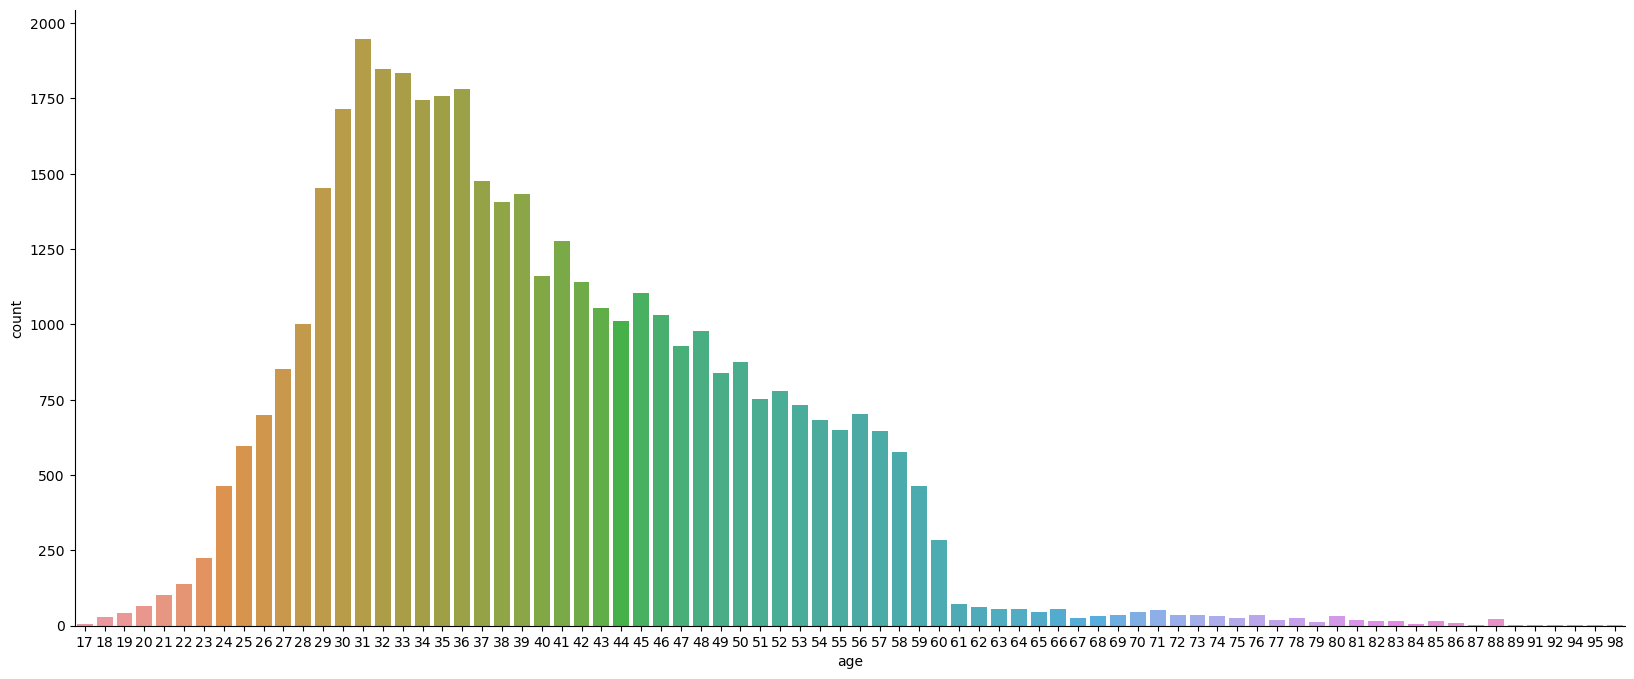

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
sns.despine()

C:\Users\Tymek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


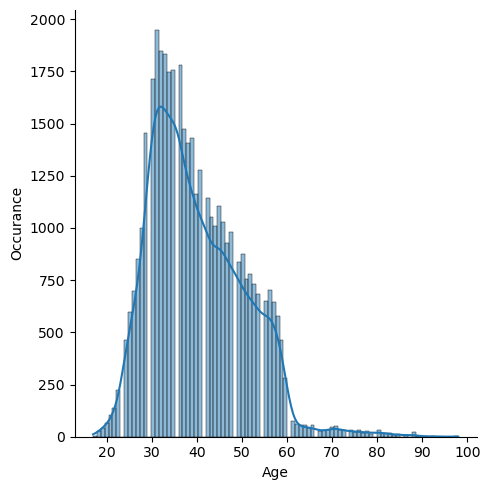

In [65]:
grid = sns.displot(bank_client['age'], kde=True, height=5)
grid.set_xlabels("Age")
grid.set_ylabels("Occurance")

In [66]:
print('MEAN:', round(bank_client['age'].mean(), 1))
print('STD :', round(bank_client['age'].std(), 1))

MEAN: 40.0
STD : 10.4


### Inforamcje o zatrudnieniu klientów

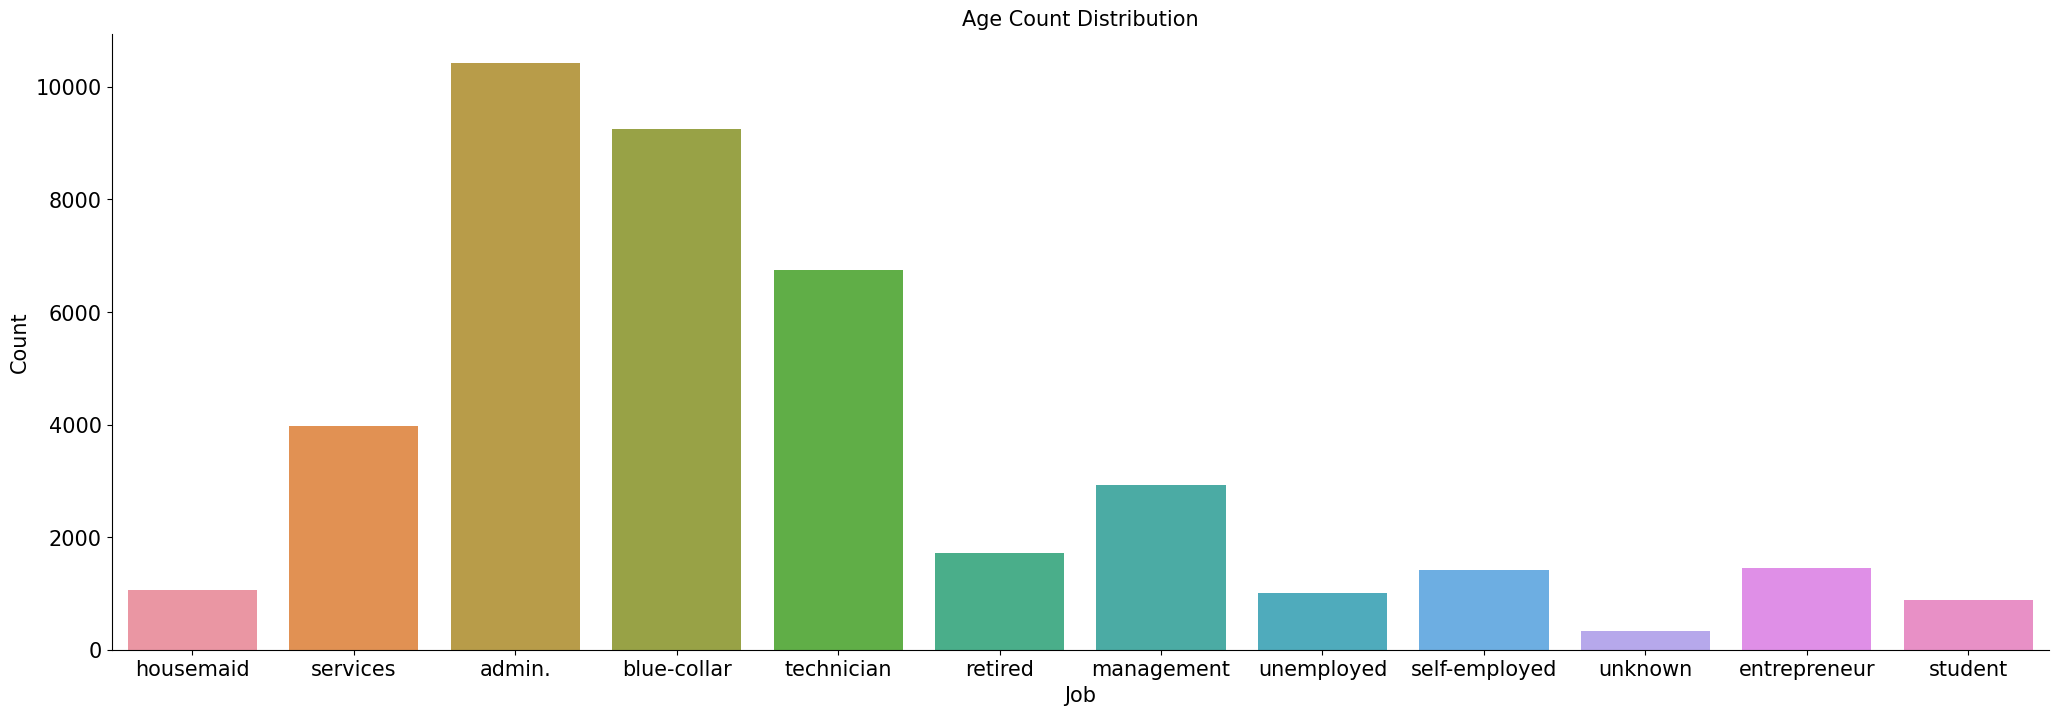

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Informacje o stanie cywilnym

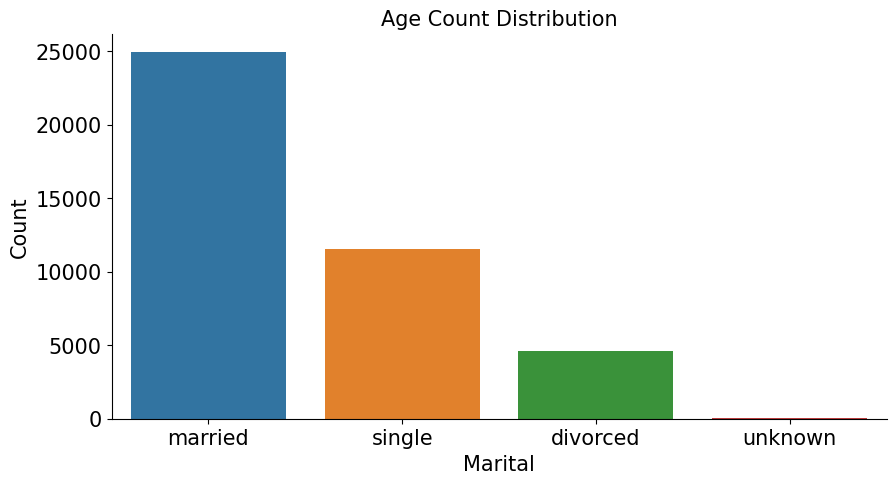

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Informacje o wykształceniu

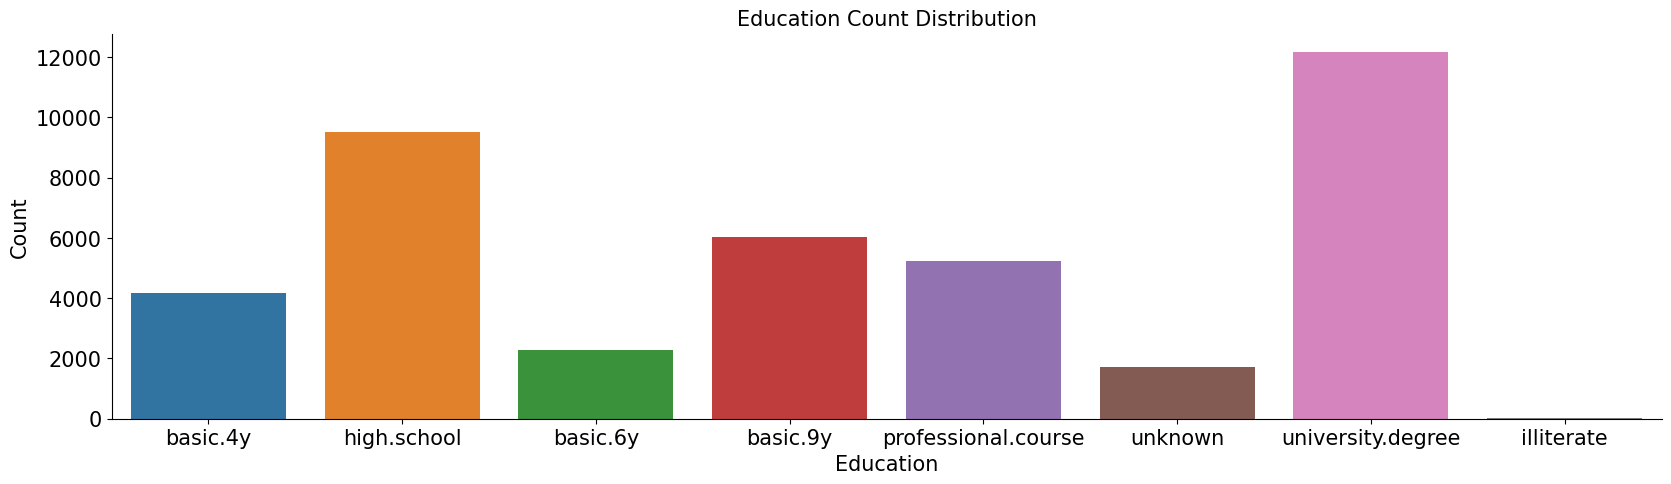

In [69]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Informacje o dotychczasowych kredytach

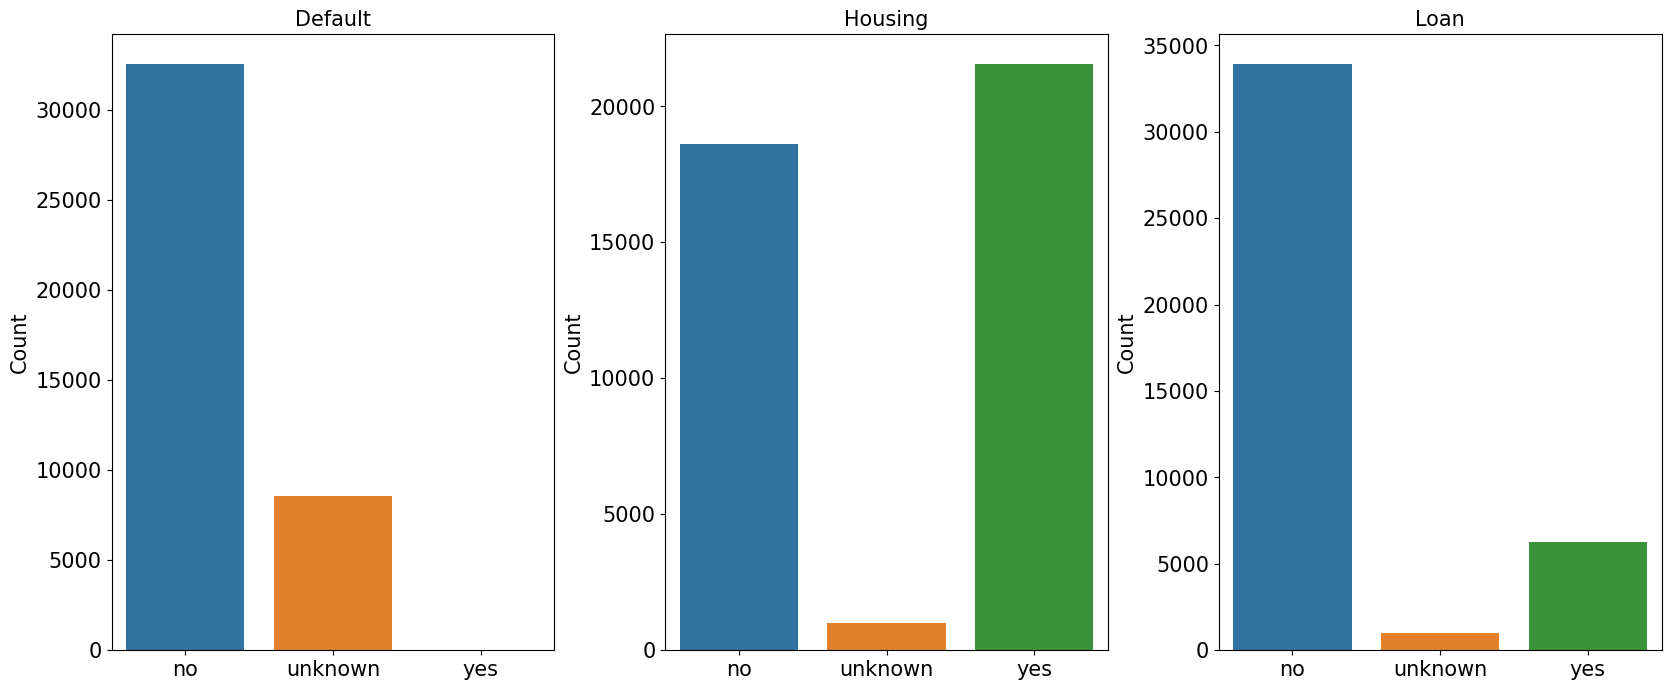

In [70]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

## Przedstawienie danych o kampanii

In [71]:
bank_related = bank.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


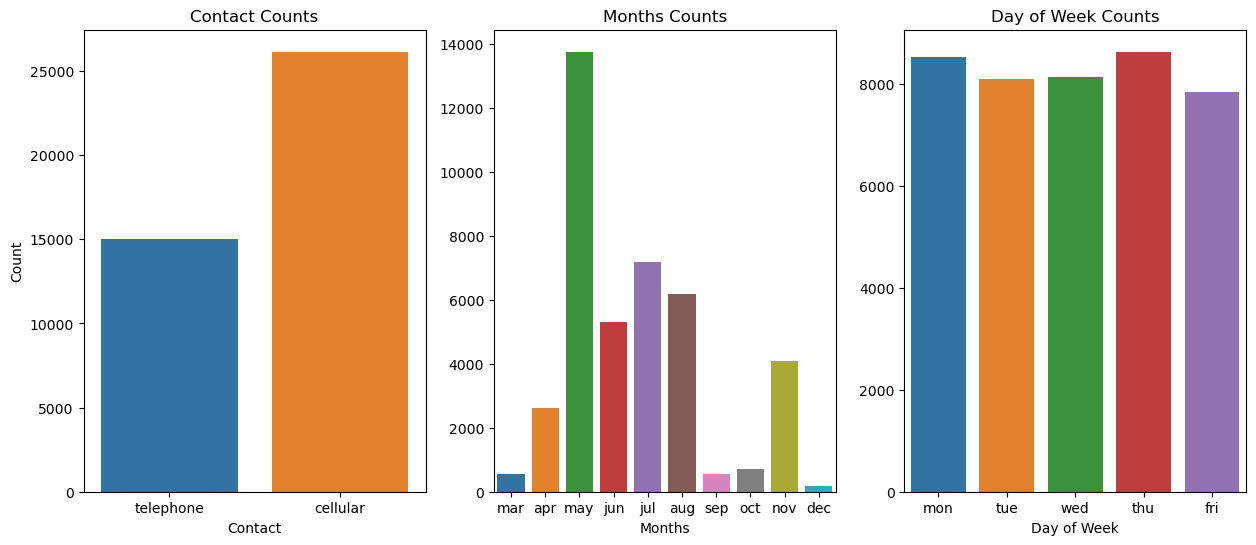

In [72]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
sns.countplot(data=bank_related, x='contact',ax=ax1)
ax1.set_xlabel('Contact', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(data=bank_related, x='month', ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(data=bank_related, x = 'day_of_week', ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.show()

## Wizualizacja heatmapy korelacji

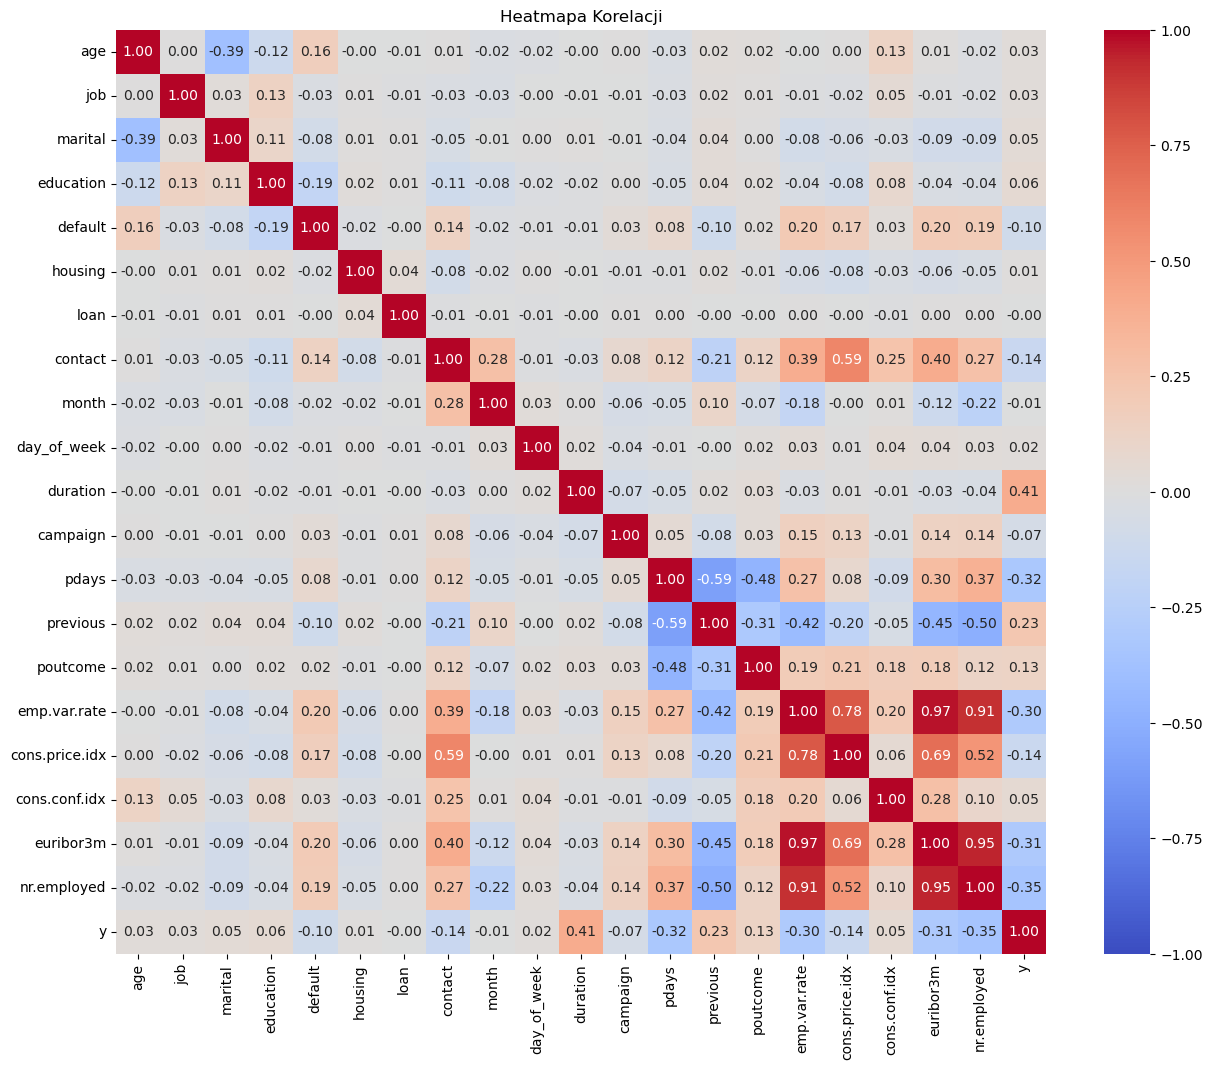

In [73]:
bank_copy = bank.copy()

categorical_columns = bank.select_dtypes(include=['object']).columns

for column in categorical_columns:
    bank_copy[column] = bank_copy[column].astype('category').cat.codes

correlation_matrix = bank_copy.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Heatmapa Korelacji")
plt.show()

### Jak możemy zauważyć największą dodatnią korelację z tym czy uda się przyciągnąć klienta ma długość rozmowy. Można też zauważyć ostatni sukces kampanii był odwrotnie skorelowany z ilością dni od osatatniego kontaktu, a także poszczególne indeksy takie jak Euribor3m , ilość zatrudnionych pracowników oraz zmienność zatrudnionych. Należy zauważyć że indeksy ekonomiczne są ze sobą mocno skorelowane.

# 3. Przygotowanie danych

## Przekształcanie danych

In [95]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank['job']      = labelencoder_X.fit_transform(bank['job']) 
bank['marital']  = labelencoder_X.fit_transform(bank['marital']) 
bank['education']= labelencoder_X.fit_transform(bank['education']) 
bank['default']  = labelencoder_X.fit_transform(bank['default']) 
bank['housing']  = labelencoder_X.fit_transform(bank['housing']) 
bank['loan']     = labelencoder_X.fit_transform(bank['loan']) 

### Funkcja do tworzenia grup wiekowych

In [96]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank);

In [97]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,3,1,0,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,7,1,3,1,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,1,7,1,3,0,2,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,1,0,1,1,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,1,7,1,3,0,0,2,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [98]:
labelencoder_X = LabelEncoder()
bank['contact']     = labelencoder_X.fit_transform(bank['contact']) 
bank['month']       = labelencoder_X.fit_transform(bank['month']) 
bank['day_of_week'] = labelencoder_X.fit_transform(bank['day_of_week'])

### Funkcja do tworzenia grup długości połączeń

In [99]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank);

In [100]:
bank['duration'].head()

0    1
1    1
2    1
3    1
4    1
Name: duration, dtype: int64

In [101]:
labelencoder_X = LabelEncoder()
bank['poutcome'] = labelencoder_X.fit_transform(bank['poutcome'])

## Wybór cech

In [107]:
bank_final = bank[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
y = bank['y']
bank_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,1,3,1,0,0,0,0,1,6,1,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
1,1,7,1,3,1,0,0,1,6,1,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
2,1,7,1,3,0,2,0,1,6,1,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
3,1,0,1,1,0,0,0,1,6,1,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
4,1,7,1,3,0,0,2,1,6,1,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1


### Wybór cech metodą chi-kwadrat

In [167]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

bank_final_norm = MinMaxScaler().fit_transform(bank_final)
chi_selector = SelectKBest(chi2, k=20)
chi_selector.fit(bank_final_norm, y)
chi_support = chi_selector.get_support()
chi_feature_20 = bank_final.loc[:,chi_support].columns.tolist()


bank_final_norm = MinMaxScaler().fit_transform(bank_final)
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(bank_final_norm, y)
chi_support = chi_selector.get_support()
chi_feature_10 = bank_final.loc[:,chi_support].columns.tolist()

bank_final_norm = MinMaxScaler().fit_transform(bank_final)
chi_selector = SelectKBest(chi2, k=5)
chi_selector.fit(bank_final_norm, y)
chi_support = chi_selector.get_support()
chi_feature_5 = bank_final.loc[:,chi_support].columns.tolist()

In [168]:
chi_feature_20

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [163]:
chi_feature_10

['education',
 'default',
 'contact',
 'emp.var.rate',
 'cons.price.idx',
 'euribor3m',
 'nr.employed',
 'pdays',
 'previous',
 'poutcome']

In [164]:
chi_feature_5

['contact', 'emp.var.rate', 'euribor3m', 'nr.employed', 'previous']

Ograniczamy maksymalną ilość cech, aby algorytm wybrał nam najlepsze cechy. W tym wypadku liczbę maksymalną ustawiłem na 10.

# 4. Tworzenie modelu i ocena

### Metoda lasów losowych

In [169]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

X_train_col = X_train[chi_feature_20].copy()
X_test_col = X_test[chi_feature_20].copy()

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_col, y_train)
rfc_pred = rfc.predict(X_test_col)

rfc_conf_mat_20 = confusion_matrix(y_test, rfc_pred)
rfc_results_20 = classification_report(y_test, rfc_pred)

print(rfc_conf_mat_20)
print(rfc_results_20)

[[7026  253]
 [ 684  275]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7279
           1       0.52      0.29      0.37       959

    accuracy                           0.89      8238
   macro avg       0.72      0.63      0.65      8238
weighted avg       0.87      0.89      0.87      8238



In [170]:
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

X_train_col = X_train[chi_feature_10].copy()
X_test_col = X_test[chi_feature_10].copy()

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_col, y_train)
rfc_pred = rfc.predict(X_test_col)

rfc_conf_mat_10 = confusion_matrix(y_test, rfc_pred)
rfc_results_10 = classification_report(y_test, rfc_pred)

print(rfc_conf_mat_10)
print(rfc_results_10)


[[7056  223]
 [ 700  259]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7279
           1       0.54      0.27      0.36       959

    accuracy                           0.89      8238
   macro avg       0.72      0.62      0.65      8238
weighted avg       0.87      0.89      0.87      8238



In [171]:
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

X_train_col = X_train[chi_feature_5].copy()
X_test_col = X_test[chi_feature_5].copy()

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_col, y_train)
rfc_pred = rfc.predict(X_test_col)

rfc_conf_mat_5 = confusion_matrix(y_test, rfc_pred)
rfc_results_5 = classification_report(y_test, rfc_pred)

print(rfc_conf_mat_5)
print(rfc_results_5)

[[7074  205]
 [ 709  250]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7279
           1       0.55      0.26      0.35       959

    accuracy                           0.89      8238
   macro avg       0.73      0.62      0.65      8238
weighted avg       0.87      0.89      0.87      8238



### Metoda naiwnego klasyfikatora Bayes'a

In [172]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

X_train_col = X_train[chi_feature_20].copy()
X_test_col = X_test[chi_feature_20].copy()

bayes = GaussianNB()
bayes.fit(X_train_col, y_train)
bayes_pred = bayes.predict(X_test_col)

bayes_conf_mat_20 = confusion_matrix(y_test, bayes_pred)
bayes_results_20 = classification_report(y_test, bayes_pred)

print(bayes_conf_mat_20)
print(bayes_results_20)

[[6413  866]
 [ 478  481]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      7279
           1       0.36      0.50      0.42       959

    accuracy                           0.84      8238
   macro avg       0.64      0.69      0.66      8238
weighted avg       0.86      0.84      0.85      8238



In [173]:
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

X_train_col = X_train[chi_feature_10].copy()
X_test_col = X_test[chi_feature_10].copy()

bayes = GaussianNB()
bayes.fit(X_train_col, y_train)
bayes_pred = bayes.predict(X_test_col)

bayes_conf_mat_10 = confusion_matrix(y_test, bayes_pred)
bayes_results_10 = classification_report(y_test, bayes_pred)

print(bayes_conf_mat_10)
print(bayes_results_10)

[[6461  818]
 [ 484  475]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7279
           1       0.37      0.50      0.42       959

    accuracy                           0.84      8238
   macro avg       0.65      0.69      0.67      8238
weighted avg       0.86      0.84      0.85      8238



In [174]:
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

X_train_col = X_train[chi_feature_5].copy()
X_test_col = X_test[chi_feature_5].copy()

bayes = GaussianNB()
bayes.fit(X_train_col, y_train)
bayes_pred = bayes.predict(X_test_col)

bayes_conf_mat_5 = confusion_matrix(y_test, bayes_pred)
bayes_results_5 = classification_report(y_test, bayes_pred)

print(bayes_conf_mat_5)
print(bayes_results_5)

[[6361  918]
 [ 459  500]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7279
           1       0.35      0.52      0.42       959

    accuracy                           0.83      8238
   macro avg       0.64      0.70      0.66      8238
weighted avg       0.87      0.83      0.85      8238



### Klasyfikator XGBoost

In [175]:
%pip install xgboost
from xgboost import XGBClassifier

y.replace({'yes': 1, 'no': 0}, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

X_train_col = X_train[chi_feature_20].copy()
X_test_col = X_test[chi_feature_20].copy()

xgb = XGBClassifier()
xgb.fit(X_train_col, y_train)
xgb_pred = xgb.predict(X_test_col)

xgb_conf_mat_20 = confusion_matrix(y_test, xgb_pred)
xgb_results_20 = classification_report(y_test, xgb_pred)

print(xgb_conf_mat_20)
print(xgb_results_20)

Note: you may need to restart the kernel to use updated packages.
[[7109  170]
 [ 692  267]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7279
           1       0.61      0.28      0.38       959

    accuracy                           0.90      8238
   macro avg       0.76      0.63      0.66      8238
weighted avg       0.88      0.90      0.88      8238



In [176]:
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

X_train_col = X_train[chi_feature_10].copy()
X_test_col = X_test[chi_feature_10].copy()

xgb = XGBClassifier()
xgb.fit(X_train_col, y_train)
xgb_pred = xgb.predict(X_test_col)

xgb_conf_mat_10 = confusion_matrix(y_test, xgb_pred)
xgb_results_10 = classification_report(y_test, xgb_pred)

print(xgb_conf_mat_10)
print(xgb_results_10)

[[7126  153]
 [ 722  237]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7279
           1       0.61      0.25      0.35       959

    accuracy                           0.89      8238
   macro avg       0.76      0.61      0.65      8238
weighted avg       0.87      0.89      0.87      8238



In [178]:
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

X_train_col = X_train[chi_feature_5].copy()
X_test_col = X_test[chi_feature_5].copy()

xgb = XGBClassifier()
xgb.fit(X_train_col, y_train)
xgb_pred = xgb.predict(X_test_col)

xgb_conf_mat_5 = confusion_matrix(y_test, xgb_pred)
xgb_results_5 = classification_report(y_test, xgb_pred)

print(xgb_conf_mat_5)
print(xgb_results_5)

[[7103  176]
 [ 734  225]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7279
           1       0.56      0.23      0.33       959

    accuracy                           0.89      8238
   macro avg       0.73      0.61      0.64      8238
weighted avg       0.87      0.89      0.87      8238



# 5. Wnioski

## Naszym zadaniem jest wybranie najlepszgo modelu
### Mamy dwa rodzaje błędów False Positive i False Nagative.
### Ten pierwszy w naszym wypadku jest gorszy gdyż może wskazywać na to, że udało się nam przyciągnąć klienta mimo, że nie jest to prawda. Dlatego określimy najlepszy model nie tylko na postawie precyzji, ale również tego, który ma najmniejsza wartość False Positive
## W naszym wypadku najlepszy model to ten oparty na XGBoost przy użyciu 10 cech wybranych metodą chi-kwadrat.
### Wszytskie nasze modele mają wysoki ogólny wynik (blisko 90%). Odstaje trochę metoda bayesowska (blisko 85%).